# 구글 드라이브로 마운트 하기


In [54]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# 작업 경로를 MyDrive 로 변경하여 구글 드라이브에 접속 후 바로 작업 디렉토리를 확인 가능
print('현재 작업 경로 :', os.getcwd())
os.chdir('/content/drive/MyDrive')
print('변경된 작업 경로 :', os.getcwd())

현재 작업 경로 : /content/drive/My Drive/Capstone-design-2/capstone-design-2/yolov5
변경된 작업 경로 : /content/drive/MyDrive


# YOLOv5 레포지토리 다운로드

출처 : https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/?ref=ultralytics

https://mvje.tistory.com/111

In [ ]:
# 처음 한번만 실행
!git clone https://github.com/ultralytics/yolov5.git  # yolov5 코드 clone

In [15]:
%cd /content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5
%ls

/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5
benchmarks.py    data.yaml   models/              README.zh-CN.md   test/           val.py
CITATION.cff     detect.py   __pycache__/         requirements.txt  train/          yolov5s.pt
classify/        export.py   README.dataset.txt   runs/             train.py
CONTRIBUTING.md  hubconf.py  README.md            segment/          tutorial.ipynb
data/            LICENSE     README.roboflow.txt  setup.cfg         utils/


In [16]:
# 필요한 패키지 다운로드 및 임포트
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import yaml
from IPython.display import Image, clear_output  # to display images

[Errno 2] No such file or directory: 'yolov5'
/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5


# 데이터셋 다운로드, yaml 파일 수정

In [17]:
%mkdir datasets
%cd /content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets

!curl -L "https://app.roboflow.com/ds/MNqNsjF52j?key=RF44hXcNeY" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   2788      0 --:--:-- --:--:-- --:--:--  2789
100 23.0M  100 23.0M    0     0  28.9M      0 --:--:-- --:--:-- --:--:-- 28.9M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/11_jpeg.rf.395e2eb039481840d699e6151a4bffac.jpg  
 extracting: test/images/14_jpg.rf.8de10472f713f81e4b3253544833a7f3.jpg  
 extracting: test/images/208_PNG.rf.ed9ab784340c767803369389f68093cf.jpg  
 extracting: test/images/215_PNG.rf.536d694f457d203024baebe493271278.jpg  
 extracting: test/images/218_PNG.rf.aebd0a3ed1f604eea8fbf457c37a66e6.jpg  
 extracting: test/images/229_PNG.rf.e41af53b1e8dad3ed

In [38]:
import yaml

# 사용할 데이터셋 경로 및 데이터셋의 yaml 파일 경로 지정
data_dir = '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets'
data_yaml = '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/data.yaml'

# 데이터셋 yaml 파일 확인
with open(data_yaml, 'r') as file:
    data = yaml.safe_load(file)
    print("원래 데이터 YAML:")
    print(data)

원래 데이터 YAML:
{'names': ['fat', 'muscle', 'weight'], 'nc': 3, 'roboflow': {'license': 'CC BY 4.0', 'project': 'inbody_data', 'url': 'https://universe.roboflow.com/capstonedesign2/inbody_data/dataset/4', 'version': 4, 'workspace': 'capstonedesign2'}, 'test': '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/test/images', 'train': '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/train/images', 'val': '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/valid/images'}


In [39]:
# 경로 수정
data['train'] = '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/train/images'
data['test'] = '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/test/images'
data['val'] = '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/valid/images'

# 수정된 데이터로 YAML 파일 덮어쓰기
with open(data_yaml, 'w') as file:
    yaml.dump(data, file)

# 수정된 데이터 확인
with open(data_yaml, 'r') as file:
    modified_data = yaml.safe_load(file)
    print("\n수정된 데이터 YAML:")
    print(modified_data)


수정된 데이터 YAML:
{'names': ['fat', 'muscle', 'weight'], 'nc': 3, 'roboflow': {'license': 'CC BY 4.0', 'project': 'inbody_data', 'url': 'https://universe.roboflow.com/capstonedesign2/inbody_data/dataset/4', 'version': 4, 'workspace': 'capstonedesign2'}, 'test': '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/test/images', 'train': '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/train/images', 'val': '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/valid/images'}


# YOLOv5 모델 학습

In [40]:
%cd '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5'
!python train.py --batch 16 --epochs 150 --data {data_yaml} --weight yolov5s.pt --cache

/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5
2023-11-01 12:01:59.711407: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 12:01:59.711469: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 12:01:59.711512: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=Non

```
# 결과
Results saved to runs/train/exp5
```

# 학습한 모델 테스트
이제 학습한 모델을 테스트 데이터셋에서 테스트 해봐야 한다. 앞서 확인한 exp 번호를 train_exp_num 에 저장해두고 테스트를 실행한다. 테스트 또한 끝나고 나면 정보가 저장된 경로가 나오는데 이 exp 번호 또한 확인해둬야 한다.



확인한 테스트 exp 번호를 text_exp_num 에 저장하고 테스트 결과 확인 코드를 실행하면 아래 그림과 같이 이미지에서 객체를 검출한 결과를 확인할 수 있다.

In [41]:
# 테스트 이미지 경로
test_data_dir = data['val']

# 실험 번호 지정 - 진행한 실험이 저장된 경로로 확인해서 기입
train_exp_num = 8

In [44]:
%cd '/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5'
!python detect.py --weights /content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/runs/train/exp{train_exp_num}/weights/best.pt --img 416 --conf 0.1 --source {test_data_dir}


/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5
detect: weights=['/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/runs/train/exp8/weights/best.pt'], source=/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-231-gc2f131a Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/12 /content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/datasets/valid/images/1113_jpeg.rf.3df4cbb68f2d08547b

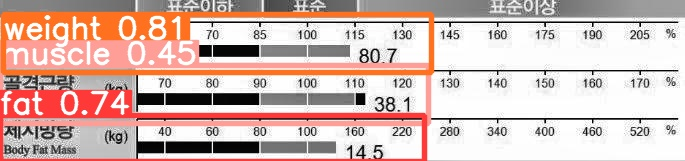

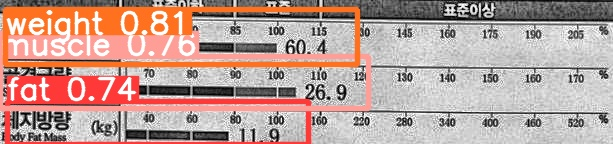

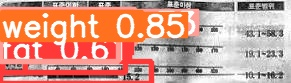

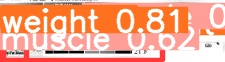

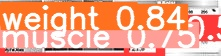

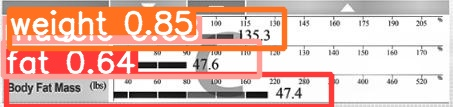

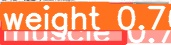

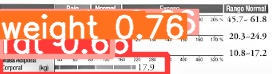

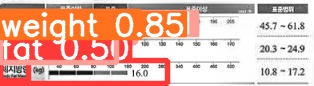

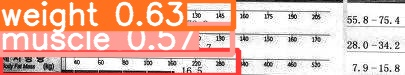

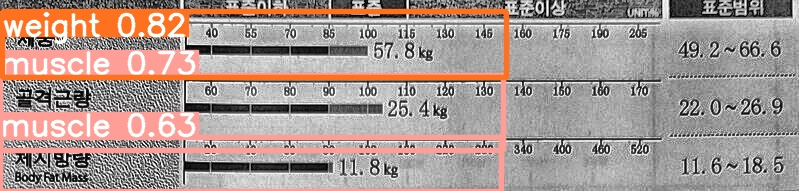

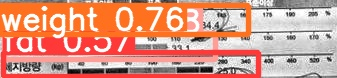

In [45]:
# 테스트 결과 확인해보기
import glob

test_exp_num = 5

if not os.path.exists('/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/runs/detect/exp' + str(test_exp_num) + '/') :
  raise Exception('test_exp_num 을 다시 확인하세요.')

for imageName in glob.glob('/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/runs/detect/exp' + str(test_exp_num) + '/*') :
  display(Image(filename=imageName))
  print("\n")



# 학습한 모델 저장
마지막으로 학습 중 결과가 가장 좋은 베스트 모델을 저장할 수 있고 저장한 모델은 언제든 불러와서 사용할 수 있게 된다.



In [ ]:
# 학습한 베스트 모델 저장
from google.colab import files
files.download('/content/drive/MyDrive/Capstone-design-2/capstone-design-2/yolov5/runs/train/exp' + str(test_exp_num))